In [101]:
#Select and Prepare dataset

In [102]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

In [103]:
#loading the data using pandas library into a data variable
data_Frame = pd.read_csv('dataset1_test.csv')
no_of_examplePoints = data_Frame.shape[0]   #no of rows
no_of_features = data_Frame.shape[1]        #no of cols
print("Total number of Example Points:", no_of_examplePoints)
print("Total number of features:", no_of_features)

Total number of Example Points: 296
Total number of features: 10


In [104]:
X = data_Frame.drop('Runs', axis=1)  # Dropping the 'Runs' column to create the input features
y = data_Frame['Runs']  # Assigning the 'Runs' column as the target variable
# Printing the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (296, 9)
Shape of y: (296,)


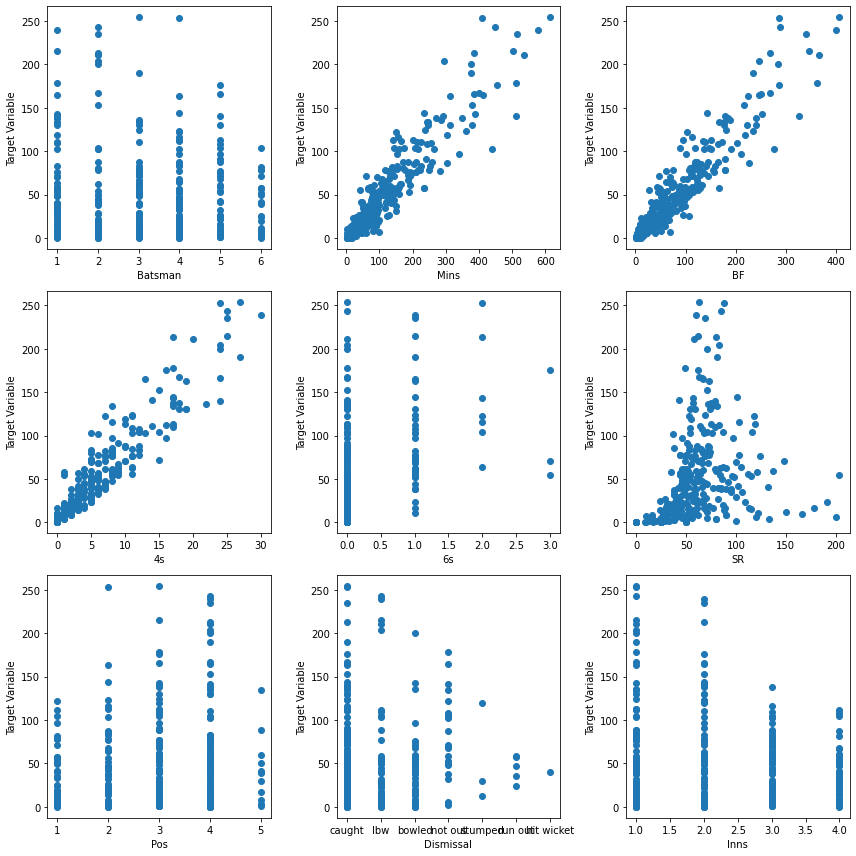

In [105]:
#Creating a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over each input feature and plot it against the target variable
for i, feature in enumerate(X.columns):
    ax = axes[i]  # Select the current subplot
    ax.scatter(X[feature], y)  # Plot the feature against the target variable
    ax.set_xlabel(feature)  # Set the x-axis label as the feature name
    ax.set_ylabel('Target Variable')  # Set the y-axis label as 'Target Variable'

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [106]:
data_Frame.head(10)  #first 10 rows of data

,Batsman,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns
0,1,33,78.0,56,5,0,58.92,3,caught,2
1,1,33,77.0,49,6,0,67.34,3,caught,4
2,1,215,503.0,346,25,1,62.13,3,lbw,1
3,1,58,67.0,48,9,0,120.83,3,bowled,3
4,1,7,26.0,18,1,0,38.88,3,caught,1
5,1,8,40.0,27,1,0,29.62,3,caught,3
6,1,6,2.0,3,1,0,200.00,3,caught,1
7,1,5,20.0,9,1,0,55.55,3,caught,3
8,1,143,387.0,252,17,2,56.74,3,bowled,1
9,1,48,98.0,78,8,0,61.53,4,bowled,1


In [107]:
data_Frame.columns

Index(['Batsman', 'Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Pos', 'Dismissal',
       'Inns'],
      dtype='object')

In [108]:
#separating numerical and categorical columns
train_num_cols = data_Frame.select_dtypes(include=np.number).columns.to_list()
test_num_cols = data_Frame.select_dtypes(include=np.number).columns.to_list()
#train_cat_cols = training_data.select_dtypes(exclude=np.number).columns.to_list()
#test_cat_cols = testing_data.select_dtypes(exclude=np.number).columns.to_list()

In [109]:
# dealing outliers for training 
# Calculating the 1st and 99th percentile of each column
quantiles = data_Frame[train_num_cols].quantile([0.1, 0.90])
# Winsorize each column to cap extreme values at the 1st and 99th percentile
data_Frame[train_num_cols] = data_Frame[train_num_cols].apply(lambda x: np.clip(x, quantiles.loc[0.1, x.name], quantiles.loc[0.90, x.name]))

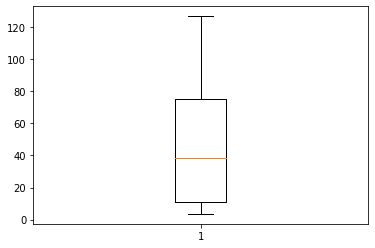

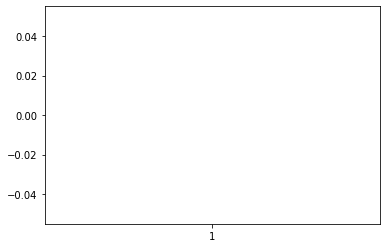

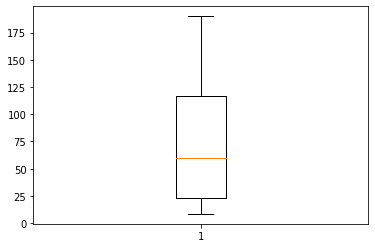

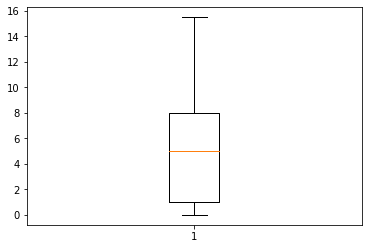

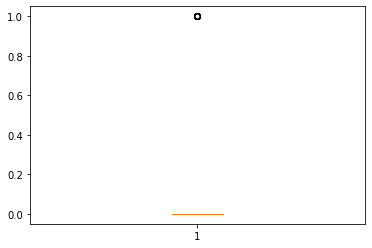

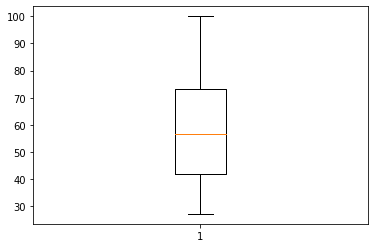

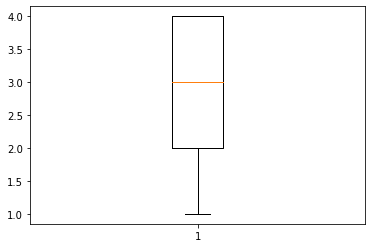

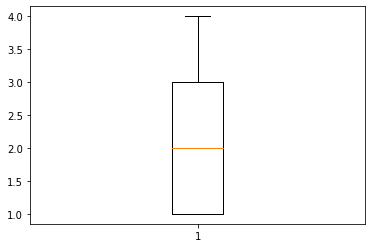

In [110]:
# Creating boxplots for each input feature
plt.boxplot(data_Frame['Runs'])
plt.show()
plt.boxplot(data_Frame['Mins'])
plt.show()
plt.boxplot(data_Frame['BF'])
plt.show()
plt.boxplot(data_Frame['4s'])
plt.show()
plt.boxplot(data_Frame['6s'])
plt.show()
plt.boxplot(data_Frame['SR'])
plt.show()
plt.boxplot(data_Frame['Pos'])
plt.show()
plt.boxplot(data_Frame['Inns'])
plt.show()

In [111]:
#data Preprocessing  ( Checking Null_Values)
# Checking for null values
null_values = data_Frame.isnull().sum()
# Displaying columns with null values
print(null_values[null_values > 0])
# Replacing null values in 'Minutes' column with a specific value
specific_value = data_Frame['Mins'].mean()  # Replace with the desired value
data_Frame['Mins'].fillna(specific_value, inplace=True)
# Verifying if null values have been replaced
print(data_Frame.isnull().sum())

Mins    4
dtype: int64
Batsman      0
Runs         0
Mins         0
BF           0
4s           0
6s           0
SR           0
Pos          0
Dismissal    0
Inns         0
dtype: int64


In [112]:
#performing one-hot encoding to take care of categorical values in dismissal feature column
# Creating a copy of the DataFrame
encoded_df = data_Frame.copy()
# Performing one-hot encoding on the "dismissal" column
encoded_df = pd.get_dummies(encoded_df, columns=['Dismissal'])
# Print the encoded DataFrame
print(encoded_df.head())

   Batsman   Runs   Mins     BF    4s  6s      SR  Pos  Inns  \
0        1   33.0   78.0   56.0   5.0   0   58.92    3     2   
1        1   33.0   77.0   49.0   6.0   0   67.34    3     4   
2        1  127.0  286.7  190.0  15.5   1   62.13    3     1   
3        1   58.0   67.0   48.0   9.0   0  100.00    3     3   
4        1    7.0   26.0   18.0   1.0   0   38.88    3     1   

   Dismissal_bowled  Dismissal_caught  Dismissal_hit wicket  Dismissal_lbw  \
0                 0                 1                     0              0   
1                 0                 1                     0              0   
2                 0                 0                     0              1   
3                 1                 0                     0              0   
4                 0                 1                     0              0   

   Dismissal_not out  Dismissal_run out  Dismissal_stumped  
0                  0                  0                  0  
1                  0    

In [113]:
#Separating the input features (X) and the target variable (y)
from sklearn.model_selection import train_test_split

X = encoded_df.drop('Runs', axis=1)
y = encoded_df['Runs']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
X_train.head()

,Batsman,Mins,BF,4s,6s,SR,Pos,Inns,Dismissal_bowled,Dismissal_caught,Dismissal_hit wicket,Dismissal_lbw,Dismissal_not out,Dismissal_run out,Dismissal_stumped
63,2,13.0,8.5,0.0,0,27.27,4,1,0,1,0,0,0,0,0
17,1,93.0,70.0,5.0,0,100.00,4,3,0,0,0,0,1,0,0
215,4,46.0,25.0,0.0,1,68.00,1,4,0,0,0,1,0,0,0
219,4,17.0,8.5,1.0,0,100.00,2,3,0,1,0,0,0,0,0
183,4,156.0,113.0,8.0,1,100.00,2,3,0,1,0,0,0,0,0


In [115]:
y_train.head()

63       3.5
17      70.0
215     17.0
219      6.0
183    116.0
Name: Runs, dtype: float64

In [116]:
X_test.head()

,Batsman,Mins,BF,4s,6s,SR,Pos,Inns,Dismissal_bowled,Dismissal_caught,Dismissal_hit wicket,Dismissal_lbw,Dismissal_not out,Dismissal_run out,Dismissal_stumped
274,5,174.0,147.0,12.0,0,70.74,1,1,0,0,0,1,0,0,0
155,3,34.0,20.0,0.0,0,40.00,4,4,1,0,0,0,0,0,0
84,2,13.0,11.0,0.0,0,54.54,4,4,0,0,0,0,1,0,0
82,2,172.0,109.0,8.0,0,74.31,4,3,0,1,0,0,0,0,0
261,5,144.0,90.0,15.0,0,100.00,3,4,0,0,0,0,1,0,0


In [117]:
y_test.head()

274    104.0
155      8.0
84       6.0
82      81.0
261    104.0
Name: Runs, dtype: float64

In [118]:
# Printing the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (296, 15)
Shape of y: (296,)


In [119]:
from sklearn.preprocessing import StandardScaler

#Creating an instance of the StandardScaler
scaler = StandardScaler()
# Fitting and transforming the input features on the training data
X_train_scaled = scaler.fit_transform(X_train)
# Applying the same transformation on the testing data
X_test_scaled = scaler.transform(X_test)

In [120]:
print("Shape of X_scaled:", X_train_scaled.shape)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)
print(X_train_scaled_df.head())

Shape of X_scaled: (236, 15)
    Batsman      Mins        BF        4s        6s        SR       Pos  \
0 -0.756483 -1.108284 -1.117758 -1.111505 -0.431196 -1.389377  0.941923   
1 -1.456601 -0.193879 -0.084700 -0.097922 -0.431196  1.793867  0.941923   
2  0.643753 -0.731092 -0.840596 -1.111505  2.319133  0.393292 -1.883845   
3  0.643753 -1.062564 -1.117758 -0.908788 -0.431196  1.793867 -0.941923   
4  0.643753  0.526216  0.637601  0.510227  2.319133  1.793867 -0.941923   

       Inns  Dismissal_bowled  Dismissal_caught  Dismissal_hit wicket  \
0 -1.269370          -0.38887          0.864956             -0.065233   
1  0.591322          -0.38887         -1.156129             -0.065233   
2  1.521668          -0.38887         -1.156129             -0.065233   
3  0.591322          -0.38887          0.864956             -0.065233   
4  0.591322          -0.38887          0.864956             -0.065233   

   Dismissal_lbw  Dismissal_not out  Dismissal_run out  Dismissal_stumped  
0    

In [121]:
from sklearn.linear_model import LinearRegression
#Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train_scaled_df, y_train)

LinearRegression()

In [122]:
#Making predictions on the test set
y_pred = model.predict(X_test_scaled_df)
print(y_pred)

[ 97.94563447   1.23649123  11.14812631  68.49278188  99.20701948
  55.46211756 129.70388882  22.29642096  54.7089658   11.81305728
  17.12356905  50.23193352   4.75816773  66.41645033  11.8856751
   6.46220239  23.16200436  24.64291349  17.16473999 122.28530322
   6.56207645  71.81646495 132.03960247   0.70370722  67.52596983
   5.42049401  87.7282018   -0.82263846  68.9104375   -3.12901639
  13.79449529 120.95205912  92.93819265  19.91715618  46.56757065
  16.78068442 130.88445216  68.40127686  75.63381905  33.71094475
  41.32159266  -3.31208317  -1.28656394  -4.79800199  74.89318169
  52.27405851 108.22563826 121.47190963  15.59388447  45.65094608
  16.25406651  56.21032626  40.60798396  45.507886    93.91347095
  27.28453931  73.64611019  54.43901249  82.62773274  39.23998569]


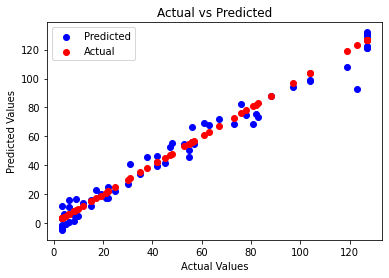

In [123]:
#scatter plot to check whether predicted values are equal to the actual values
plt.scatter(y_test, y_pred, c='b', label='Predicted')
plt.scatter(y_test, y_test, c='r', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

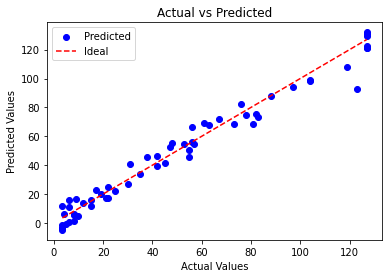

In [124]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='b', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--', label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [125]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 48.241132663612795


In [126]:
from sklearn.metrics import r2_score
# Calculate R-squared score
r2_score = r2_score(y_test, y_pred)

# Print the R-squared score
print("R-squared score: ", r2_score)

R-squared score:  0.9712215292604854


In [127]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Instantiating the RFE object with the linear regression model and the desired number of features to select
rfe = RFE(estimator=model, n_features_to_select=5)  # Selecting 5 features

# Fit the RFE object to the training data
rfe.fit(X_train_scaled_df, y_train)

# Get the selected features
selected_features = X_train_scaled_df.columns[rfe.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['BF', '4s', '6s', 'SR', 'Dismissal_not out'], dtype='object')


In [128]:
# Create a new training set with only the selected features
X_train_selected = X_train_scaled_df[selected_features]

# Create a new test set with only the selected features
X_test_selected = X_test_scaled_df[selected_features]

# Train the linear regression model using the selected features
model.fit(X_train_selected, y_train)


LinearRegression()

In [129]:
#Making predictions on the test set
y_pred = model.predict(X_test_selected)
print(y_pred)

[ 95.92119687   2.50982515  11.99536081  69.54244433  99.82583826
  54.81402276 128.28901138  21.78488955  59.11431708  12.07105302
  16.22019786  49.81375496   4.96137525  64.77222168  11.57381866
   6.38366677  23.54150144  22.90465486  16.52873916 121.59834503
   7.08585275  73.60704741 131.65863372   0.80103594  67.74845994
   6.01903354  86.91830671   0.28939256  69.18046148  -3.79016845
  12.85829736 120.69850786  92.49215094  18.54679924  46.1301515
  16.22425652 129.76695609  69.3332168   76.42902936  39.90908843
  41.31129277  -4.74666937  -3.3868157   -4.74666937  74.33834647
  51.0464535  108.30596435 120.4965494   14.73407879  44.37423611
  14.90411331  55.50005299  41.53867227  46.74071692  94.22299393
  29.15936749  73.921687    54.47374252  82.94012116  38.72101194]


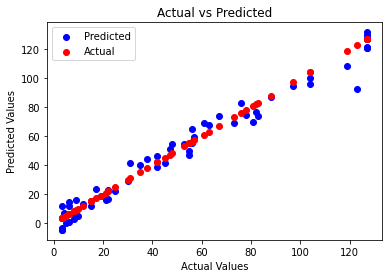

In [130]:
#scatter plot to check whether predicted values are equal to the actual values
plt.scatter(y_test, y_pred, c='b', label='Predicted')
plt.scatter(y_test, y_test, c='r', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [131]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 48.24451849834005


In [132]:
from sklearn.metrics import r2_score
# Calculate R-squared score
r2_score = r2_score(y_test, y_pred)

# Print the R-squared score
print("R-squared score: ", r2_score)


R-squared score:  0.971219509425124
